In [1]:
from astropy.io import fits
from astropy.io.votable import parse_single_table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
obs_dir = '../../../data/observations'
sample_path = f'{obs_dir}/photometry/gaia/xmatch/all-bands/3705768362187755776.vot'

In [3]:
sample_votable = parse_single_table(sample_path)
sample_table = sample_votable.to_table()
sample_df = pd.DataFrame(np.array(sample_table))
sample_df = sample_df[sample_df['band']==b'G']
sample = sample_df.sort_values(by='time', ascending=True)

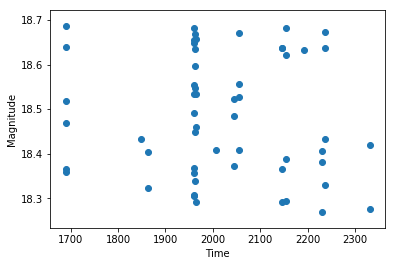

In [4]:
plt.scatter(sample.time, sample.mag)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()

In [5]:
bands = [[key, df.drop('band', axis=1)] for key, df in sample_df.groupby('band')]

In [6]:
sample_path = f'{obs_dir}/spectra/sdss/xmatch/spec-0266-51630-0197.fits'

In [7]:
def plot_spec(path, cls, plot_lines=False, norm=False, trim=False):
    hdulist = fits.open(path)
    flux = hdulist[1].data['flux']
    if norm:
        scaler = MinMaxScaler()
        flux = flux.reshape(-1,1)
        scaler.fit(flux)
        flux = scaler.transform(flux) 
        flux = flux.reshape(-1)
    loglam = hdulist[1].data['loglam']
    wlen = [10**(w) for w in loglam]
    
    title = cls + ' Optical Spectrum' 
    
    fs = 14
    plt.rcParams.update({'font.size': fs})
    fig = plt.figure(figsize=(12,5), dpi=200)
    ax = fig.add_subplot(111)
    ax.plot(wlen,flux, linewidth =0.4, c='black')
    ax.set_ylabel('Flux '+ r'$[10^{-17} erg\; cm^{-2} s^{-1} Å^{-1}]$')
    ax.set_xlabel('Wavelength [Ångströms]')
    ax.set_title(title)
    
    
    if trim:
        ax.axvline(3800, c='r')
        ax.axvline(9200, c='r')
    
    if plot_lines:
        y0, y1 = ax.get_ylim()
        lines = {r'$H_{\alpha}$':6564.6, r'$H_{\beta}$': 4862.7, '$H_{\gamma}$':4341.7}
        for key, x in lines.items():
            ax.axvline(x, c='r')
            ax.text(x+40, (y0+y1)/2, key, rotation=90, fontsize=fs)

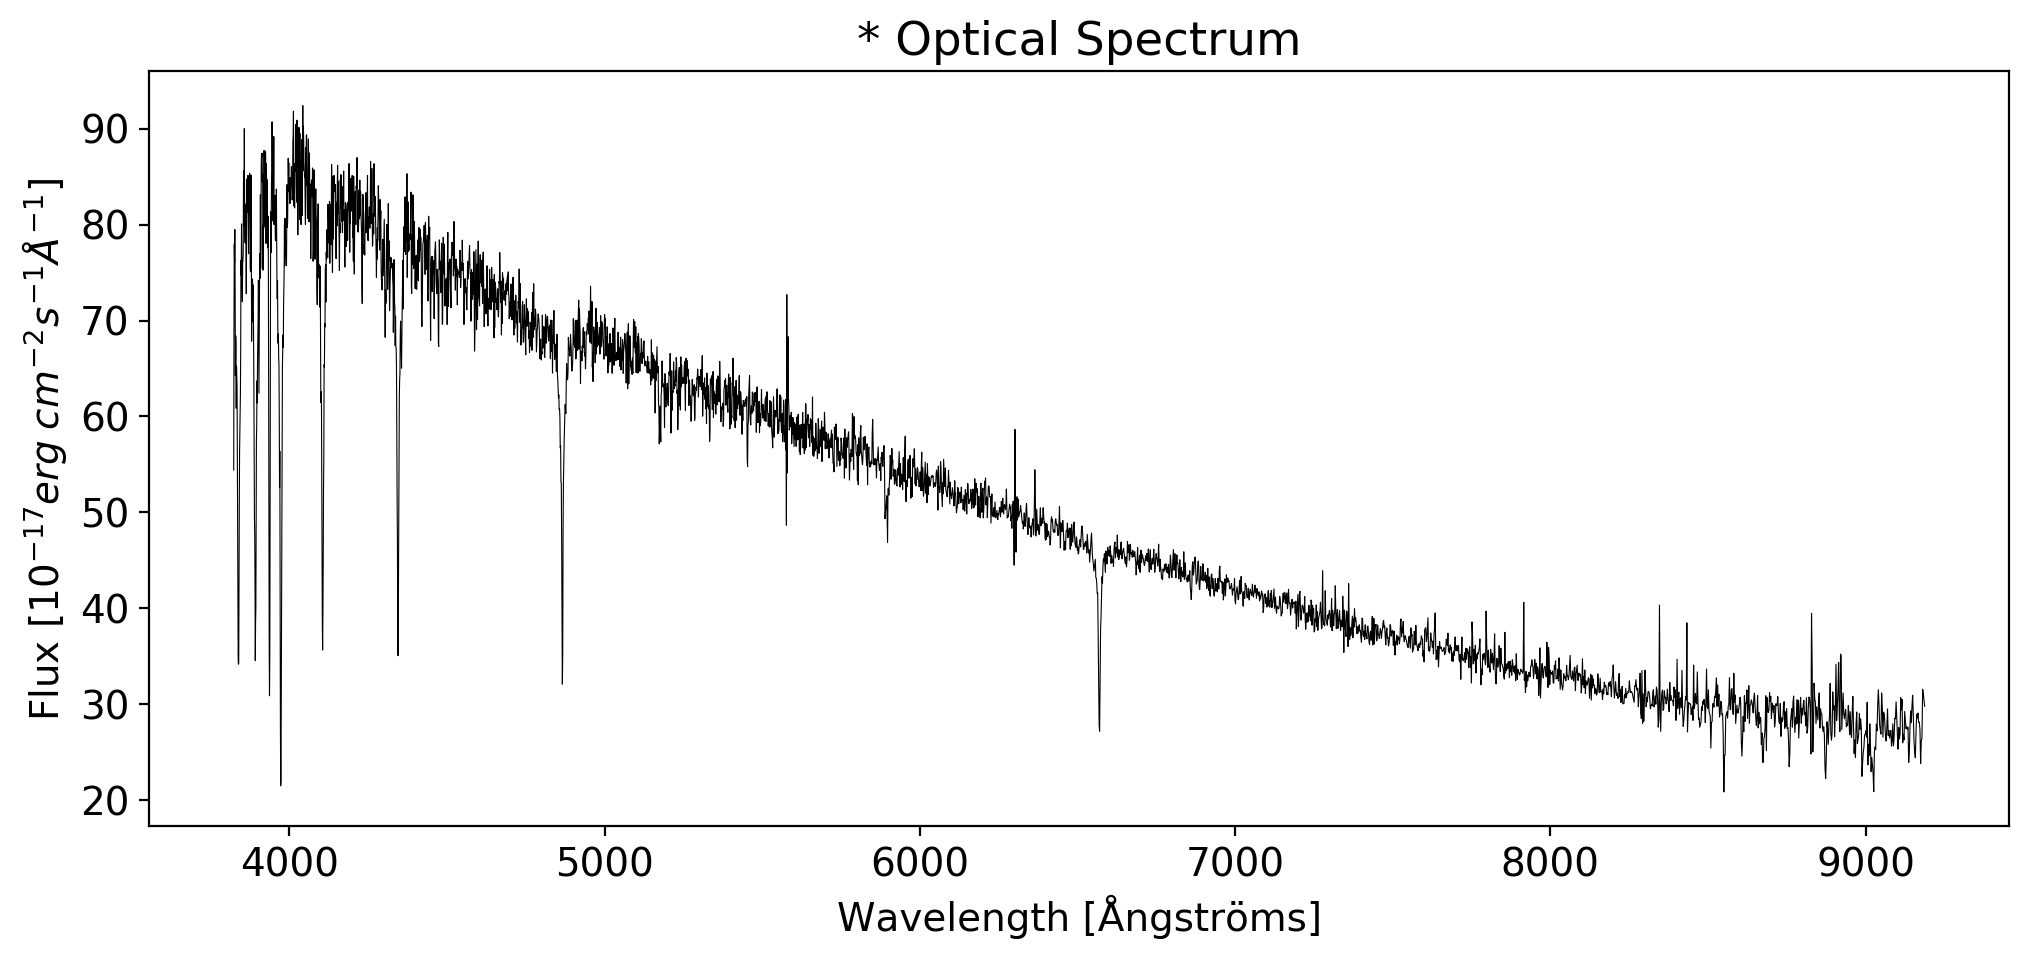

In [8]:
plot_spec(sample_path, '*')

In [9]:
hdulist = fits.open(sample_path)
flux = hdulist[1].data['flux']

In [10]:
aux = hdulist[0]

In [11]:
K = hdulist[2].data.ELODIE_TEFF
gravity = hdulist[2].data.ELODIE_LOGG
feh = hdulist[2].data.ELODIE_FEH
z = hdulist[2].data.ELODIE_Z

In [12]:
fiber = hdulist[0].header['FIBERID']
plate = hdulist[0].header['PLATEID']
mjd = hdulist[0].header['MJD']